In [29]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
churn_df = pd.read_csv("churn_df.csv")
x = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values
print (x.shape, y.shape)

(3333, 2) (3333,)


In [3]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",15
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [4]:
X_new = np.array([[56.8,17.5],[24.4,24.1],[50.1,10.9]])
print (X_new.shape)

(3, 2)


predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30,  stratify=y, random_state=21)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print (knn.score(X_test,y_test))

0.869


In [35]:
diabetes_df = pd.read_csv("diabetes.csv",index_col = 0)

print ( diabetes_df.head())

   pregnancies  glucose  triceps  insulin   bmi  age  diabetes
0            6      148       35        0  33.6   50         1
1            1       85       29        0  26.6   31         0
2            8      183        0        0  23.3   32         1
3            1       89       23       94  28.1   21         0
4            0      137       35      168  43.1   33         1


In [36]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print ( type(X), type(y))
print(diabetes_df.shape)
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
print(diabetes_df.shape)
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
print(diabetes_df.shape)
diabetes_df.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768, 7)
(757, 7)
(752, 7)


,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1


In [37]:
X_bmi = X[:,3]
print (y.shape, X_bmi.shape)

(768,) (768,)


In [38]:
X_bmi = X_bmi.reshape(-1,1)
print (X_bmi.shape)

(768, 1)


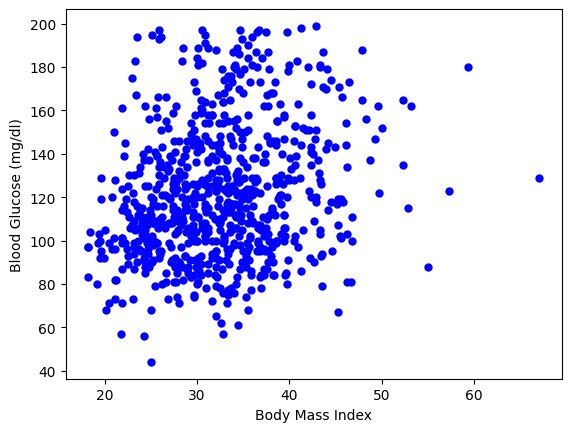

In [39]:
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
X = diabetes_df.drop('glucose', axis=1).values

y = diabetes_df['glucose'].values
X_bmi = X[:,3]
X_bmi = X_bmi.reshape(-1,1)
plt.scatter(X_bmi, y, s = 25, color = 'blue')
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
plt.show()


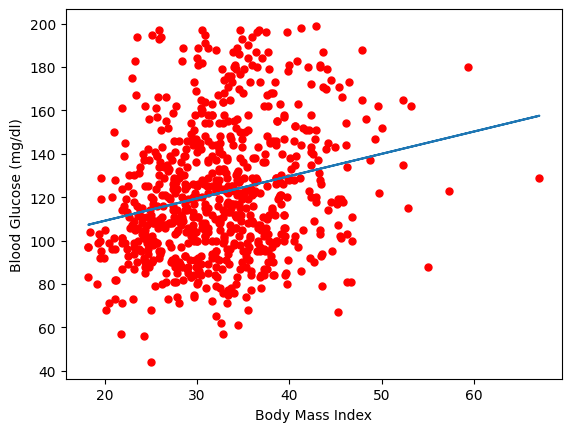

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)
plt.scatter( X_bmi, y, s = 25, color = 'red')
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
Y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.356302876407827

In [14]:
from sklearn.metrics import root_mean_squared_error
# This gives you the RMSE directly
rmse = root_mean_squared_error(y_test, Y_pred)
print(rmse)

24.028109426907236


In [15]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)
print(cv_results)

[0.30595861 0.41644724 0.38622806 0.21833257 0.31371062 0.32609546]


In [16]:
print(np.mean(cv_results), np.std(cv_results))

0.32779542755605523 0.06315820378984004


<div style="background-color: #AAFF00; padding: 15px; border-radius: 10px;">
<h2 style="margin-top:0;">Assignments</h2></div>


In [17]:
X = churn_df[["account_length","customer_service_calls"]].values
y = churn_df["churn"].values
print (X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)
X_new = np.array([[56.8,17.5],[24.4,24.1],[50.1,10.9]])
print (X_new.shape)

predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

(3333, 2) (3333,)
(3, 2)
Predictions: [0 0 0]


In [18]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [0 1 0]


In [19]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
print(X.shape, y.shape)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

(3333, 7) (3333,)
0.8455772113943029


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8758439609902475, np.int64(3): 0.881470367591898, np.int64(4): 0.8649662415603901, np.int64(5): 0.8675918979744937, np.int64(6): 0.8593398349587397, np.int64(7): 0.8612153038259565, np.int64(8): 0.8552138034508627, np.int64(9): 0.8563390847711928, np.int64(10): 0.8552138034508627, np.int64(11): 0.8548387096774194, np.int64(12): 0.8552138034508627} 
 {np.int64(1): 0.7796101949025487, np.int64(2): 0.848575712143928, np.int64(3): 0.8350824587706147, np.int64(4): 0.8470764617691154, np.int64(5): 0.8455772113943029, np.int64(6): 0.8530734632683659, np.int64(7): 0.8530734632683659, np.int64(8): 0.8545727136431784, np.int64(9): 0.8530734632683659, np.int64(10): 0.8545727136431784, np.int64(11): 0.8545727136431784, np.int64(12): 0.8545727136431784}


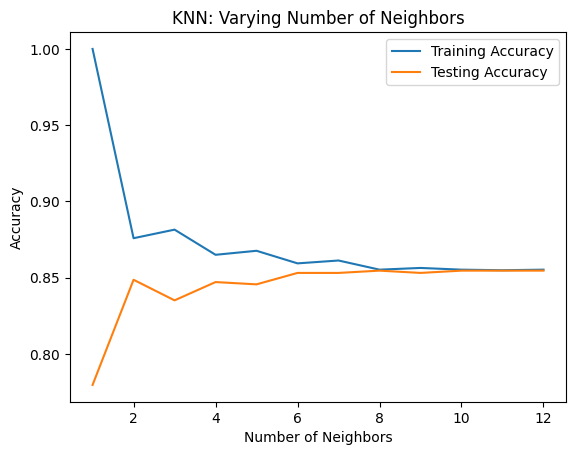

In [20]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  	# Set up a KNN Classifier
  	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
  	# Fit the model
  	knn.fit(X_train, y_train)
  
  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
# Plot training accuracies
plt.plot(neighbors, my_train, label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, my_test, label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

Shape of X: (4546, 1)
Shape of y: (4546,)

Five sample predictions:
[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


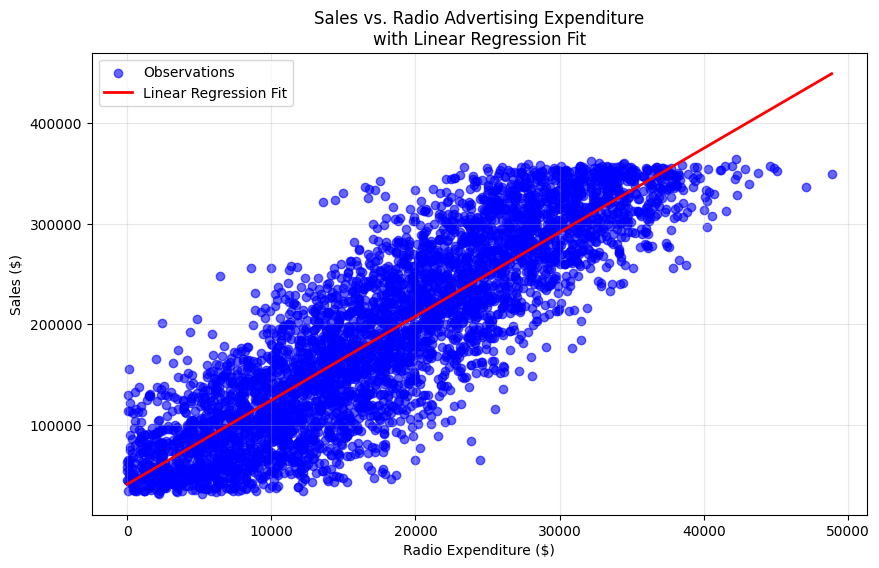

In [22]:
sales_df = pd.read_csv('sales_df.csv')

X = sales_df['radio'].values.reshape(-1, 1)  
y = sales_df['sales'].values                


print("Shape of X:", X.shape)
print("Shape of y:", y.shape) 


model = LinearRegression()
model.fit(X, y)                     
predictions = model.predict(X)    

print("\nFive sample predictions:")
print(predictions[:5])

plt.figure(figsize = (10, 6))
plt.scatter(X, y, color = 'blue', alpha = 0.6, label = 'Observations') 

X_sorted = np.sort(X, axis=0)
predictions_sorted = model.predict(X_sorted)

plt.plot(X_sorted, predictions_sorted, color = 'red', linewidth = 2, label = 'Linear Regression Fit')  

plt.xlabel('Radio Expenditure ($)')
plt.ylabel('Sales ($)')
plt.title('Sales vs. Radio Advertising Expenditure\nwith Linear Regression Fit')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

In [23]:
X = sales_df.drop("sales", axis=1).values

y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

r_squared = reg.score(X_test, y_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))


Predictions: [53099.56399301 71056.14674591], Actual Values: [55261.28 67574.9 ]
R^2: 0.9990147957135925
RMSE: 2945.053185610729


In [24]:
from sklearn.model_selection import KFold, cross_val_score

sales_df = sales_df.iloc[:, 1:]

X = sales_df[['radio', 'social_media']]
y = sales_df['sales']


reg = LinearRegression()
kf = KFold(n_splits=6, shuffle=True, random_state=5)

cv_scores = cross_val_score(reg, X, y, cv=kf)

print("CV scores:", cv_scores)

mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)
print("Mean:", mean_score)
print("STD:", std_score)


ci_lower = np.quantile(cv_scores, 0.025)
ci_upper = np.quantile(cv_scores, 0.975)
print("Confidence interval:", [ci_lower, ci_upper])

CV scores: [0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]
Mean: 0.7536937414361207
STD: 0.012305389070474664
Confidence interval: [np.float64(0.7414186258008111), np.float64(0.7719191575451564)]


<div style="background-color: #AAFF00; padding: 15px; border-radius: 10px;">
<h2 style="margin-top:0;">Lecture 10</h2></div>


In [25]:
music_df = pd.read_csv('music.csv')
music_dummies = pd.get_dummies(music_df["genre"], drop_first = True)
print(music_dummies.head())

   Anime  Blues  Classical  Country  Electronic  Hip-Hop   Jazz    Rap   Rock
0  False  False      False    False       False    False   True  False  False
1  False  False      False    False       False    False  False   True  False
2  False  False      False    False        True    False  False  False  False
3  False  False      False    False       False    False  False  False   True
4  False  False      False    False       False    False  False   True  False


In [40]:
music_dummies = pd.concat([music_df, music_dummies], axis = 1)
music_dummies = music_dummies.drop("genre", axis = 1)

print(music_dummies)

     popularity  acousticness  danceability  duration_ms  energy  \
1          31.0       0.73900         0.565     261000.0   0.393   
2          57.0       0.00879         0.433     263000.0   0.815   
3          63.0       0.01050         0.359     564000.0   0.762   
5          65.0           NaN         0.491         -1.0     NaN   
6          44.0       0.71000         0.627          NaN   0.496   
..          ...           ...           ...          ...     ...   
916         NaN           NaN           NaN          NaN     NaN   
948         NaN           NaN           NaN          NaN     NaN   
972         NaN           NaN           NaN          NaN     NaN   
978         NaN           NaN           NaN          NaN     NaN   
980         NaN           NaN           NaN          NaN     NaN   

     instrumentalness  liveness  loudness  speechiness    tempo  ...  valence  \
1            0.000845     0.143    -9.309        0.024   75.537  ...    0.636   
2            0.000000

In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
X = music_dummies.drop("popularity", axis = 1).values
y = music_dummies["popularity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
kf = KFold(n_splits=5, shuffle = True, random_state = 42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

[8.14828914 8.63267535 7.56370022 8.61139914 7.91041513]


<div style="background-color: #AAFF00; padding: 15px; border-radius: 10px;">
<h2 style="margin-top:0;">Assignments</h2></div>


In [31]:
music_df = pd.read_csv('music_unclean.csv', index_col=0)

print("Initial missing values (sorted):")
print(music_df.isna().sum().sort_values())

subset_cols = ['genre', 'popularity', 'loudness', 'liveness', 'tempo']
music_df = music_df.dropna(subset=subset_cols)

print("\nAfter dropping rows:")
print("Shape:", music_df.shape)
print(music_df.isna().sum().sort_values())

music_df["genre"] = (music_df["genre"] == "Rock").astype(int)

print("\nClass distribution:")
print(music_df["genre"].value_counts(normalize=True))

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


imputer = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors=3)
pipeline = Pipeline([("imputer", imputer), ("knn", knn)])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))
print("\nAccuracy:", pipeline.score(X_test, y_test))

Initial missing values (sorted):
genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
instrumentalness     91
duration_ms          91
danceability        143
valence             143
energy              200
acousticness        200
dtype: int64

After dropping rows:
Shape: (892, 12)
popularity            0
loudness              0
liveness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
energy              178
acousticness        178
dtype: int64

Class distribution:
genre
0    0.5
1    0.5
Name: proportion, dtype: float64

Confusion Matrix:
[[78 57]
 [55 78]]

Accuracy: 0.582089552238806


In [32]:
imputer = SimpleImputer()
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imp, y_train)

y_pred = knn.predict(X_test_imp)

print("Confusion Matrix (without pipeline):")
print(confusion_matrix(y_test, y_pred))
print("Accuracy (without pipeline):", knn.score(X_test_imp, y_test))

Confusion Matrix (without pipeline):
[[78 57]
 [55 78]]
Accuracy (without pipeline): 0.582089552238806


In [33]:
def find_best_k(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    scores = []
    for k in range(1, 31):
        pipeline = Pipeline([
            ("imputer", SimpleImputer()),
            ("knn", KNeighborsClassifier(n_neighbors=k))
        ])
        pipeline.fit(X_train, y_train)
        scores.append(pipeline.score(X_test, y_test))
    best_k = np.argmax(scores) + 1
    best_score = max(scores)
    return best_k, best_score

best_k_03, best_score_03 = find_best_k(0.3)
best_k_02, best_score_02 = find_best_k(0.2)

print("test_size=0.3 -> Best K:", best_k_03, "Accuracy:", best_score_03)
print("test_size=0.2 -> Best K:", best_k_02, "Accuracy:", best_score_02)

test_size=0.3 -> Best K: 1 Accuracy: 0.5895522388059702
test_size=0.2 -> Best K: 1 Accuracy: 0.6145251396648045
